In [43]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
import safeopt
import stageopt

mpl.rcParams['figure.figsize'] = (20.0, 10.0)
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.markersize'] = 20

## Define a kernel and function

Here we define a kernel. The function is drawn at random from the GP and is corrupted my Gaussian noise

In [44]:
# Measurement noise
noise_var = 0.05 ** 2

# Bounds on the inputs variable
bounds = [(-10., 10.)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)

# Define Kernel
kernel = GPy.kern.RBF(input_dim=len(bounds), variance=2., lengthscale=1.0, ARD=True)

# Initial safe point
x0 = np.zeros((1, len(bounds)))

# Generate function with safe initial point at x=0
def sample_safe_fun():
    while True:
        fun = safeopt.sample_gp_function(kernel, bounds, noise_var, 100)
        if fun(0, noise=False) > 0.5:
            break
    return fun

## Interactive run of the algorithm

In [45]:
# Define the objective function
fun = sample_safe_fun()

# The statistical model of our objective function
gp1 = GPy.models.GPRegression(x0, fun(x0), kernel, noise_var=noise_var)
gp2 = GPy.models.GPRegression(x0, fun(x0), kernel, noise_var=noise_var)

# The optimization routine
# opt = safeopt.SafeOptSwarm(gp, 0., bounds=bounds, threshold=0.2)
# opt = safeopt.SafeOpt(gp, parameter_set, 0., lipschitz=None, threshold=0.2)
safe_opt = safeopt.SafeOpt(gp1, parameter_set, 0., lipschitz=None, threshold=0.2)
stage_opt = stageopt.StageOpt(gp2, parameter_set, 0., lipschitz=None, threshold=0.2, switch_time=5)

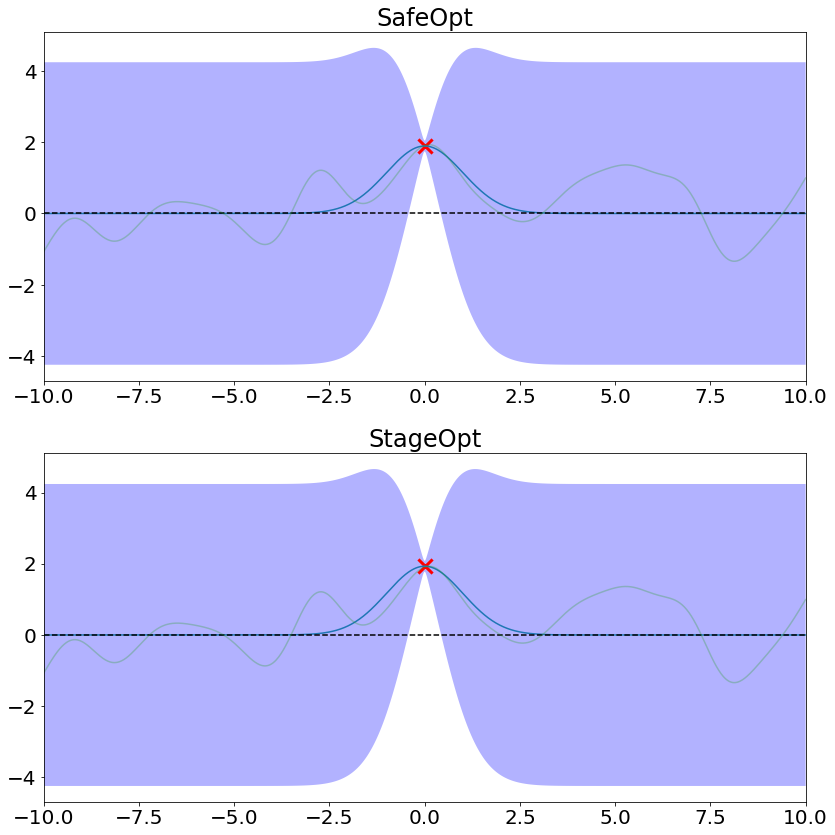

In [46]:
def plot_gp():
    # 创建两个子图
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    # 绘制 safe_opt 的图
    safe_opt.plot(1000, axis=axes[0])  # 在第一个子图上绘制
    axes[0].plot(parameter_set, fun(parameter_set, noise=False), color='C2', alpha=0.3)
    axes[0].set_title("SafeOpt")

    # 绘制 stage_opt 的图
    stage_opt.plot(1000, axis=axes[1])  # 在第二个子图上绘制
    axes[1].plot(parameter_set, fun(parameter_set, noise=False), color='C2', alpha=0.3)
    axes[1].set_title("StageOpt")

    # 调整布局
    plt.tight_layout()
    plt.show()

plot_gp()

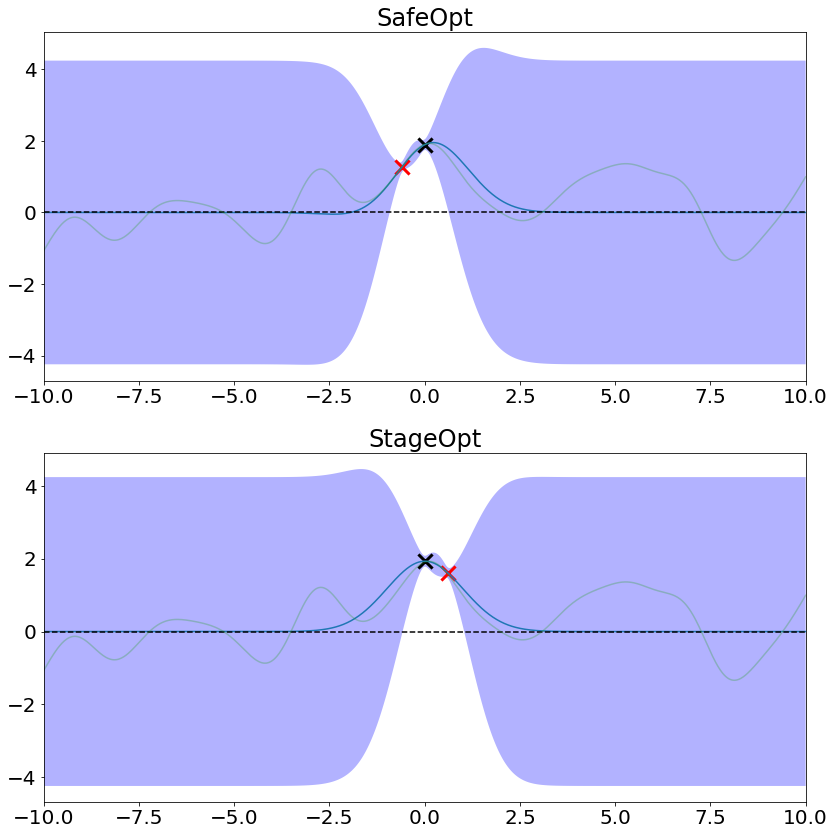

In [47]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

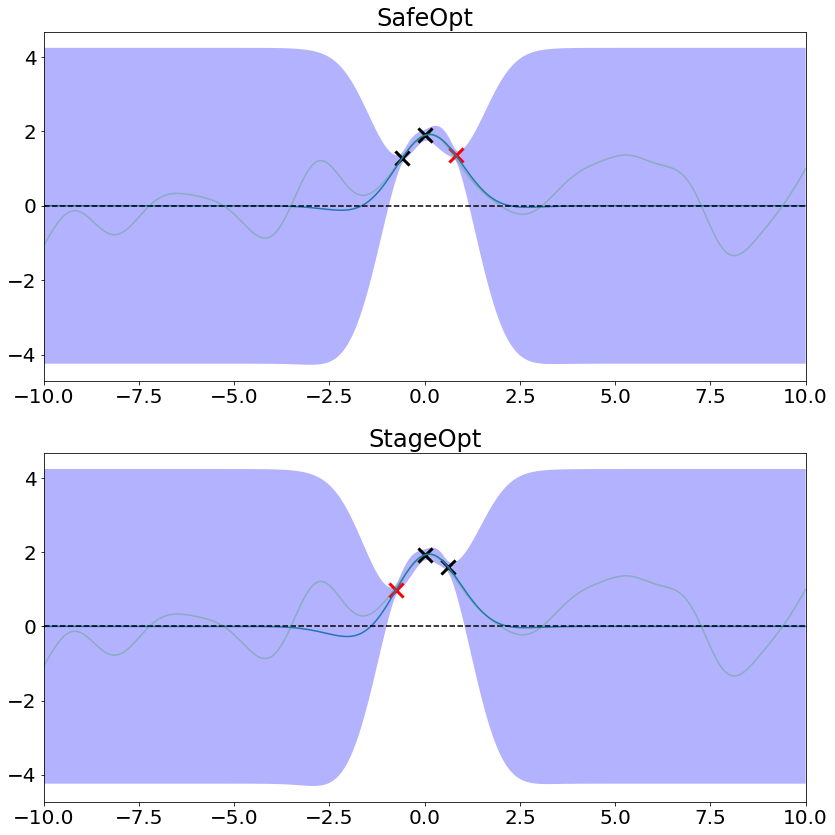

In [48]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

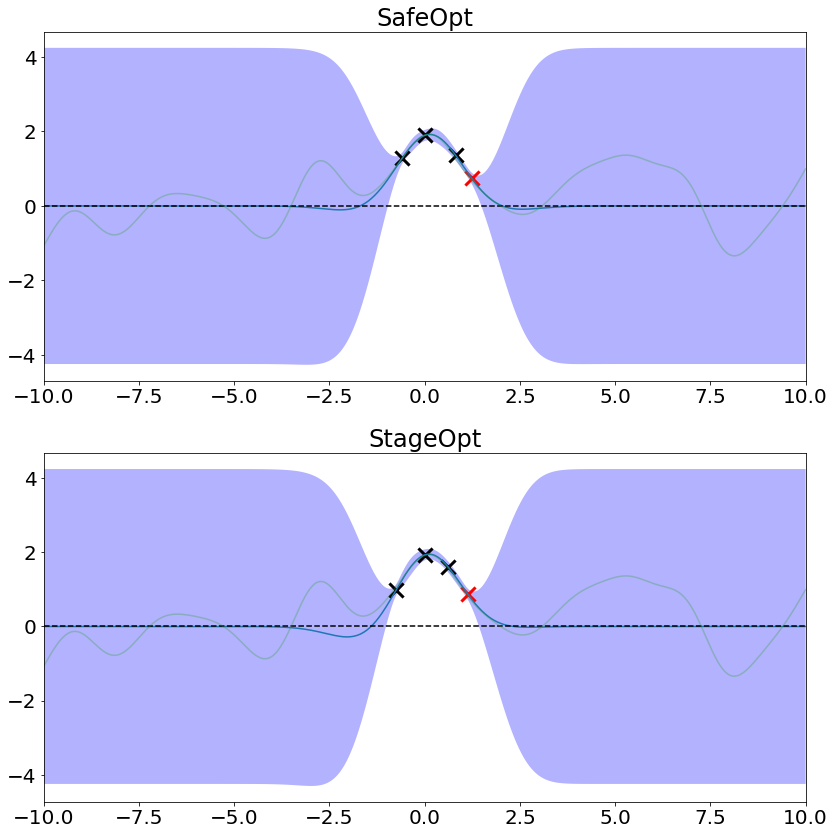

In [49]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

In [50]:
print(stage_opt.should_exploit())

False


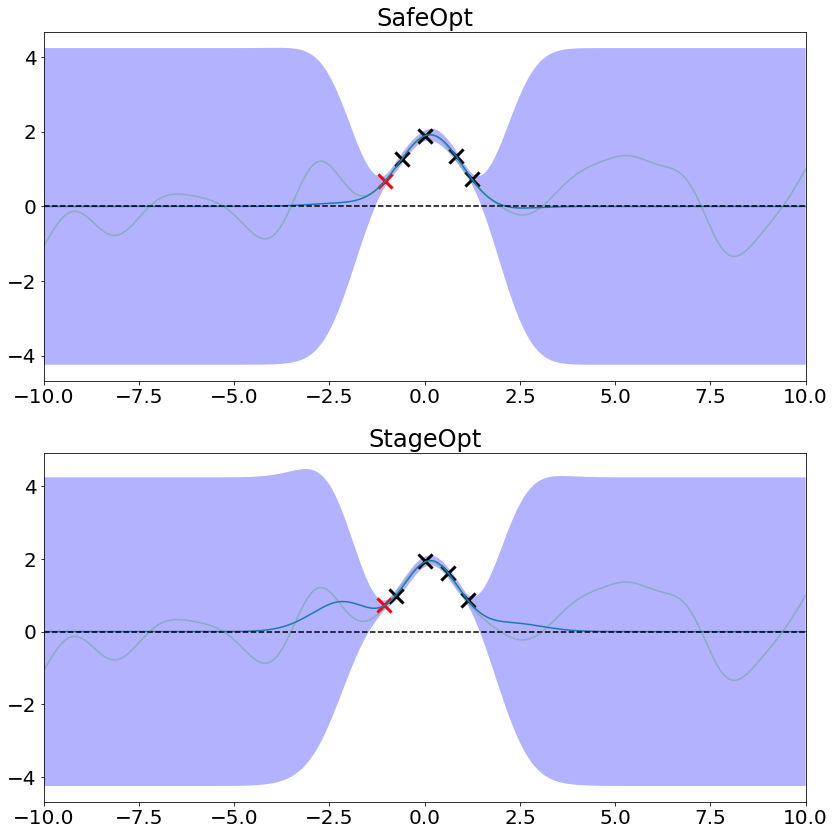

In [51]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

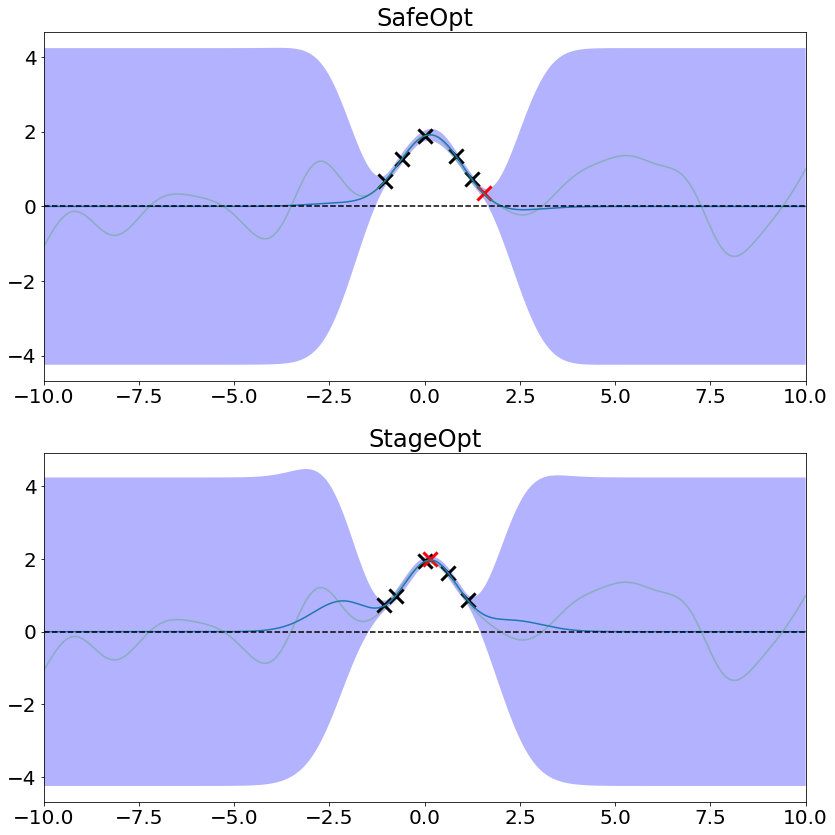

In [52]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

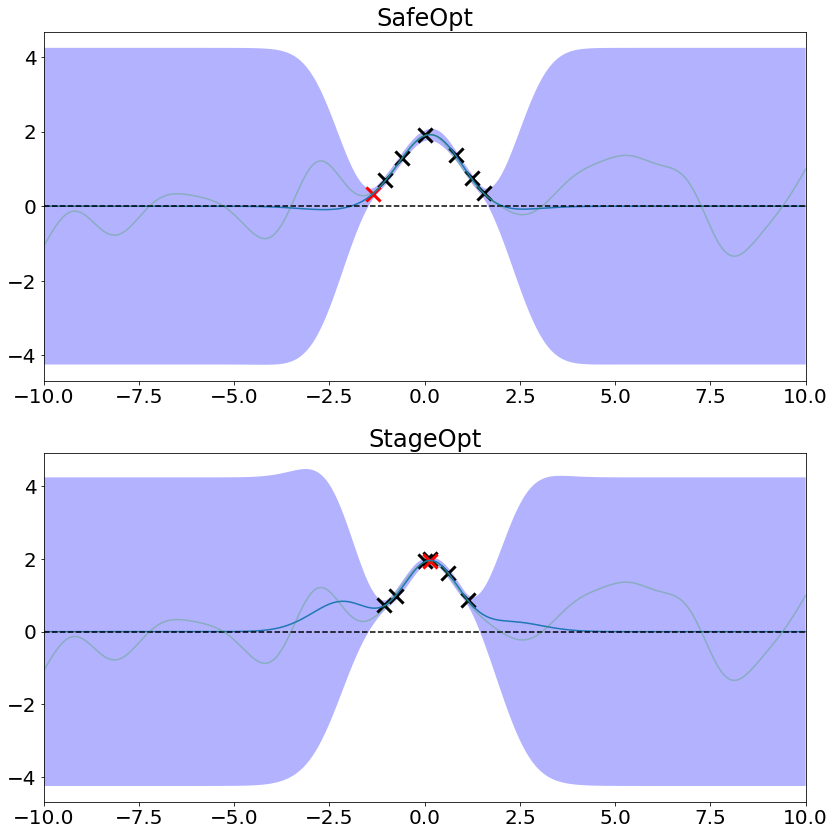

In [53]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

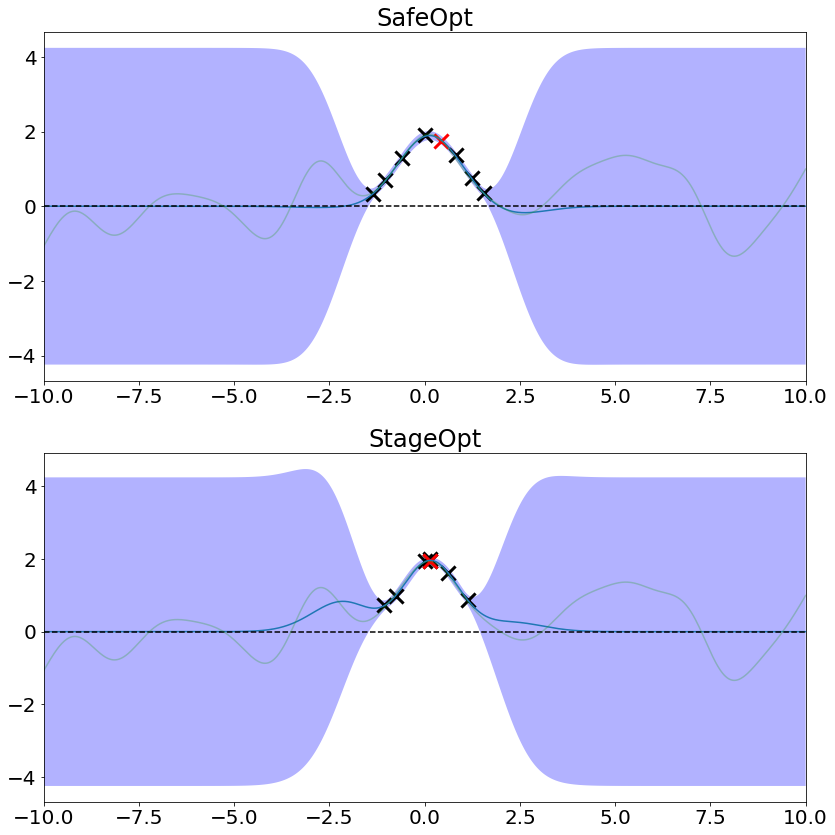

In [54]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

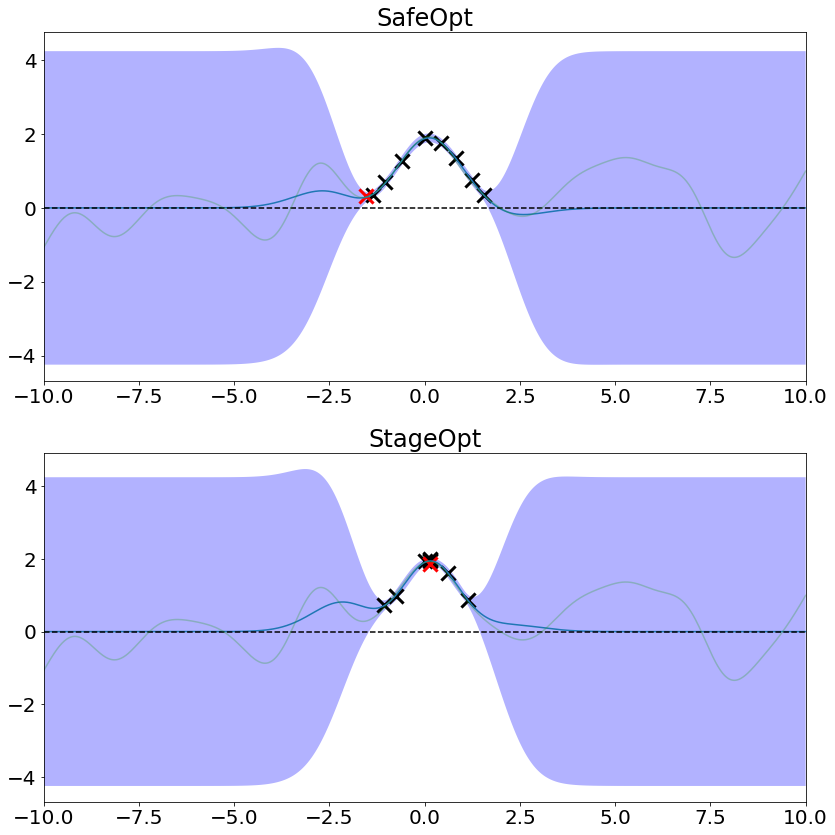

In [55]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

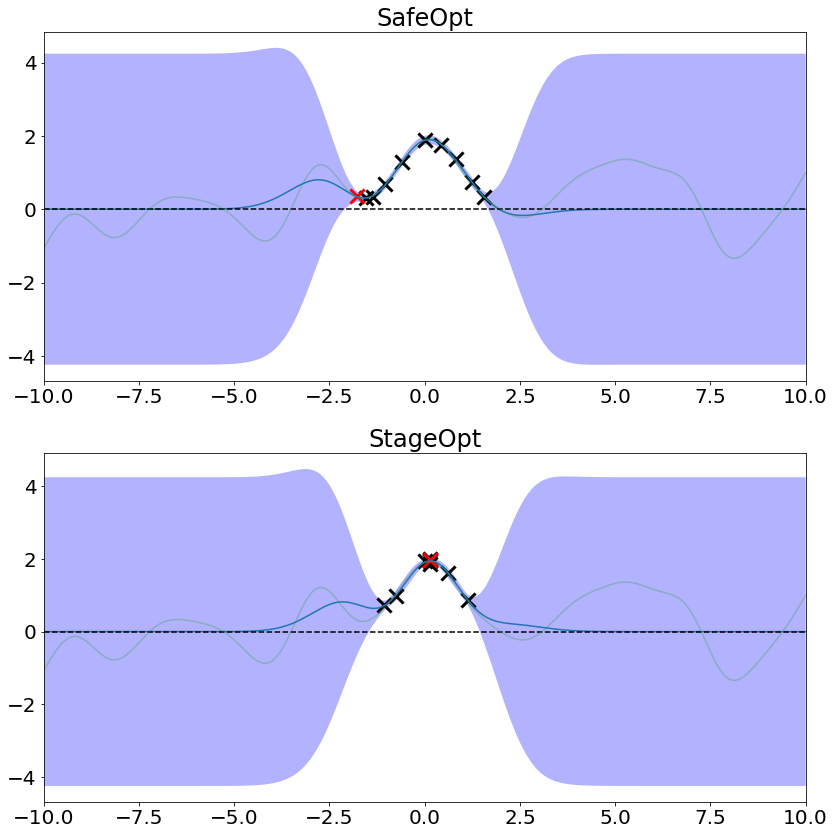

In [56]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()